#### Import libraries

In [74]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
from pandas.tseries.offsets import MonthEnd


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [75]:
# Configuring the API key

quandl.ApiConfig.api_key = '2Bhyj-nZjfjqz7b1okr1'

### Importing from Quandl

In [76]:
# Importing the Consumer Price Index for USA variable

data = quandl.get('RATEINF/CPI_USA')

In [77]:
data.head()

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [78]:
data.shape

(1326, 1)

In [79]:
data.columns

Index(['Value'], dtype='object')

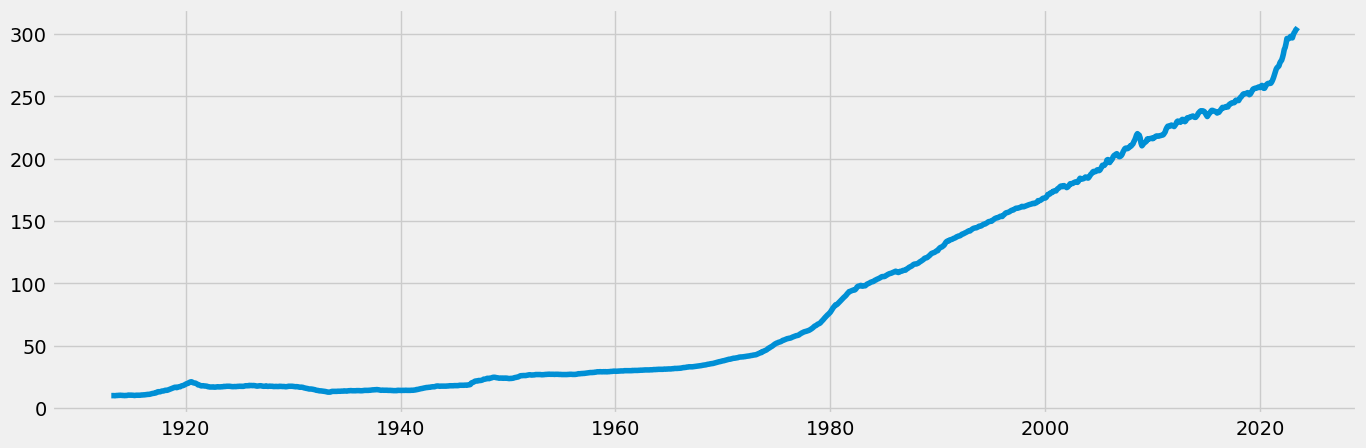

In [80]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

### Importing the csv file, subsetting, wrangling, and cleaning it

In [81]:
df = pd.read_csv(r'C:\Myra\CareerFoundry\Data Immersion\Achievment 6\df_merged2.csv', index_col = False)

In [82]:
df.head()

,incident_id,month,year,state,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,...,suspect,victim,unknown_type,latitude,longitude,incident_url,source_url,sources,state_house_district,state_senate_district
0,461105,Jan,2013,Pennsylvania,3,1,1,0,0,5,...,1,4,0,40.3467,-79.8559,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,Jan,2013,California,1,0,4,0,0,4,...,1,4,0,33.9090,-118.3330,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,Jan,2013,Ohio,5,0,0,0,0,5,...,2,3,0,41.4455,-82.1377,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,Jan,2013,Colorado,3,1,0,0,0,4,...,1,3,0,39.6518,-104.8020,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,Jan,2013,North Carolina,2,2,0,0,1,3,...,1,3,0,36.1140,-79.9569,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [83]:
df_sub = df[['incident_id', 'month', 'year', 'male_count', 'female_count',
       'unknown_gender', 'child_0-11', 'teen_12-17', 'adult_18+',
       'unknown_age_group', 'arrested', 'injured', 'killed', 'unharmed',
       'unknown_status', 'suspect', 'victim']]

In [84]:
df_sub.head()

,incident_id,month,year,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim
0,461105,Jan,2013,3,1,1,0,0,5,0,1,4,0,0,0,1,4
1,460726,Jan,2013,1,0,4,0,0,4,1,0,3,1,0,1,1,4
2,478855,Jan,2013,5,0,0,0,0,5,0,2,3,1,2,0,2,3
3,478925,Jan,2013,3,1,0,0,0,4,0,0,0,4,0,0,1,3
4,478959,Jan,2013,2,2,0,0,1,3,0,0,2,2,0,0,1,3


In [85]:
df_sub['year'].max()

2018

In [86]:
df_sub['year'].value_counts()

2017    61401
2016    58763
2015    53579
2014    51854
2018    13802
2013      278
Name: year, dtype: int64

In [87]:
# Checking till when is the gun violence data recorded 
sub_year = df_sub[df_sub['year'] == 2018]
unique_months = sub_year['month'].unique()

In [88]:
print(unique_months)

['Jan' 'Feb' 'Mar']


The guin violence data is recorded from January 2013 to March 2018. 

In [89]:
df_sub['month'].value_counts()

Jan     23091
Mar     22640
Jul     21126
Aug     21040
May     19930
Oct     19890
Sept    19656
Feb     18841
Jun     18755
Apr     18628
Dec     18106
Nov     17974
Name: month, dtype: int64

In [90]:
# Making a new column where the months are changed into numbers which will later be merged with year
replacement_dict = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04', 'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08', 'Sept': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}
df_sub['new_month'] = df_sub['month'].replace(replacement_dict)

In [91]:
df_sub.dtypes

incident_id           int64
month                object
year                  int64
male_count            int64
female_count          int64
unknown_gender        int64
child_0-11            int64
teen_12-17            int64
adult_18+             int64
unknown_age_group     int64
arrested              int64
injured               int64
killed                int64
unharmed              int64
unknown_status        int64
suspect               int64
victim                int64
new_month            object
dtype: object

In [92]:
df_sub['year'] = df_sub['year'].astype(str)

In [93]:
# Merging the 'new_month' and 'year' column together
df_sub['date'] = df_sub['year'] + '-' + df_sub['new_month']

In [94]:
df_sub.head()

,incident_id,month,year,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,new_month,date
0,461105,Jan,2013,3,1,1,0,0,5,0,1,4,0,0,0,1,4,01,2013-01
1,460726,Jan,2013,1,0,4,0,0,4,1,0,3,1,0,1,1,4,01,2013-01
2,478855,Jan,2013,5,0,0,0,0,5,0,2,3,1,2,0,2,3,01,2013-01
3,478925,Jan,2013,3,1,0,0,0,4,0,0,0,4,0,0,1,3,01,2013-01
4,478959,Jan,2013,2,2,0,0,1,3,0,0,2,2,0,0,1,3,01,2013-01


In [95]:
df_sub['date_time'] = pd.to_datetime(df_sub['date'], format='%Y-%m') + MonthEnd(0)

In [96]:
# Deleting 'new_month', 'date', 'year' and 'month' now
df_sub = df_sub.drop('new_month', axis=1)

In [97]:
df_sub = df_sub.drop('date', axis=1)

In [98]:
df_sub = df_sub.drop('month', axis=1)

In [99]:
df_sub = df_sub.drop('year', axis=1)

In [100]:
df_sub.head()

,incident_id,male_count,female_count,unknown_gender,child_0-11,teen_12-17,adult_18+,unknown_age_group,arrested,injured,killed,unharmed,unknown_status,suspect,victim,date_time
0,461105,3,1,1,0,0,5,0,1,4,0,0,0,1,4,2013-01-31
1,460726,1,0,4,0,0,4,1,0,3,1,0,1,1,4,2013-01-31
2,478855,5,0,0,0,0,5,0,2,3,1,2,0,2,3,2013-01-31
3,478925,3,1,0,0,0,4,0,0,0,4,0,0,1,3,2013-01-31
4,478959,2,2,0,0,1,3,0,0,2,2,0,0,1,3,2013-01-31


In [101]:
df_sub.dtypes

incident_id                   int64
male_count                    int64
female_count                  int64
unknown_gender                int64
child_0-11                    int64
teen_12-17                    int64
adult_18+                     int64
unknown_age_group             int64
arrested                      int64
injured                       int64
killed                        int64
unharmed                      int64
unknown_status                int64
suspect                       int64
victim                        int64
date_time            datetime64[ns]
dtype: object

In [102]:
agg_data = df_sub.groupby('date_time').count()['incident_id']

In [103]:
agg_data.head()

date_time
2013-01-31    15
2013-02-28    12
2013-03-31    19
2013-04-30    17
2013-05-31    27
Name: incident_id, dtype: int64

In [104]:
agg_data2 = agg_data.reset_index()

In [105]:
# Rename 'incident_id' to 'Number of incidents'
agg_data2.rename(columns = {'incident_id':'Number of incidents'}, inplace = True)

In [106]:
# Rename 'date_time' to 'Date'
agg_data2.rename(columns = {'date_time':'Date'}, inplace = True)

In [107]:
agg_data2.head()

,Date,Number of incidents
0,2013-01-31,15
1,2013-02-28,12
2,2013-03-31,19
3,2013-04-30,17
4,2013-05-31,27


### Subsetting, wrangling, and cleaning the Quandl data

In [108]:
# Resetting index so that I can use the "Date" column as a filter

data_2 = data.reset_index()

In [109]:
data_2.head()

,Date,Value
0,1913-01-31,9.8
1,1913-02-28,9.8
2,1913-03-31,9.8
3,1913-04-30,9.8
4,1913-05-31,9.7


In [110]:
data_2.dtypes

Date     datetime64[ns]
Value           float64
dtype: object

In [111]:
# Reducing the rows before merging it with the other data
data_sub = data_2.loc[(data_2['Date'] >= '2013-01-31') & (data_2['Date'] < '2018-03-31')]

The range of these dates are selected in the 'data_sub' because the gun violence dataset is limited to these dates. For future analysis, it makes sense to include the CPI of only those months/years that can correspond with the gun violence data.

In [112]:
# Renaming the column name 'Value' to 'CPI'
data_sub.rename(columns = {'Value':'CPI'}, inplace = True)

In [113]:
data_sub.head()

,Date,CPI
1200,2013-01-31,230.280
1201,2013-02-28,232.166
1202,2013-03-31,232.773
1203,2013-04-30,232.531
1204,2013-05-31,232.945


#### Merging 'data_sub' and 'agg_data2'

In [114]:
merged_df = pd.merge(data_sub, agg_data2, on='Date')

In [115]:
merged_df.shape

(62, 3)

In [116]:
merged_df.head()

,Date,CPI,Number of incidents
0,2013-01-31,230.280,15
1,2013-02-28,232.166,12
2,2013-03-31,232.773,19
3,2013-04-30,232.531,17
4,2013-05-31,232.945,27


#### Exporting 'merged_df' in csv

In [117]:
#Importing this dataset for further use in the analysis
merged_df.to_csv('C:\Myra\CareerFoundry\Data Immersion\Achievment 6\df_final.csv', index=False)

##### I deleted all the other variables and took the count of the incidents to see the number of incidents in a month. Then I merged the two dataframes so that moving forward I can check if the gun violence incidents have anything to do with inflation for that month. 

In [118]:
# Set the "Date" column as the index

from datetime import datetime

merged_df['datetime'] = pd.to_datetime(merged_df['Date']) # Create a datetime column from "Date.""
merged_df = merged_df.set_index('datetime') # Set the datetime as the index of the dataframe.
merged_df.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
merged_df.head()

,CPI,Number of incidents
datetime,,
2013-01-31,230.280,15
2013-02-28,232.166,12
2013-03-31,232.773,19
2013-04-30,232.531,17
2013-05-31,232.945,27


In [119]:
# Checking for missing values (I shouldn't have any)

merged_df.isnull().sum() 

CPI                    0
Number of incidents    0
dtype: int64

In [120]:
# Checking for duplicates

dups = merged_df.duplicated()
dups.sum()

# No dups!

0

In [121]:
new_data = merged_df.drop('Number of incidents', axis=1)

In [122]:
new_data.head()

,CPI
datetime,
2013-01-31,230.280
2013-02-28,232.166
2013-03-31,232.773
2013-04-30,232.531
2013-05-31,232.945


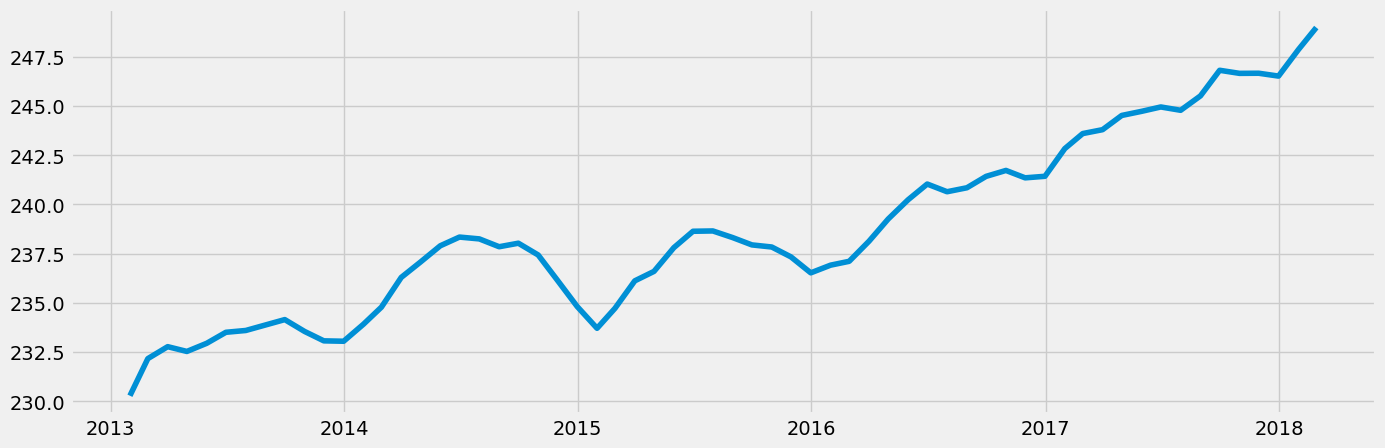

In [123]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(new_data)

### Time-series analysis: decomposition (before smoothing)

In [125]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(new_data, model='additive')

In [126]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

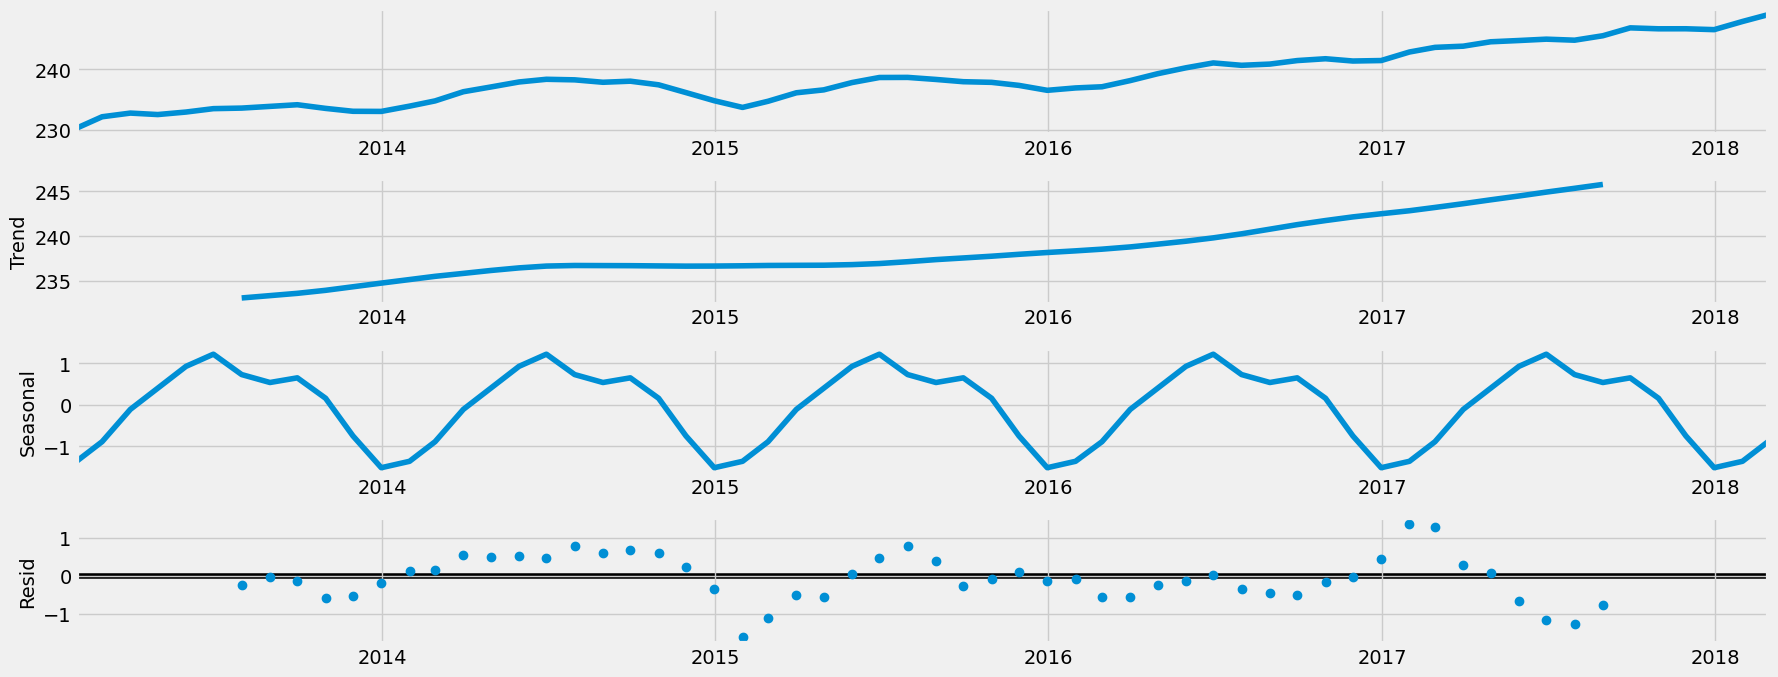

In [127]:
# Plotting the separate components

decomposition.plot()
plt.show()

- The first chart in the figure above is the data itself (including all of its components). This is called the level.
- The trend line (which is the second chart above) gradually increases showing the increase in Consumer Price Index or inflation over the years
- The third chart is the seasonality. Here, the seasonal fluctuations represented by the upward curves changes at regular intervals. This means that prices of good rise during the middle of the year, perhaps due to increase in demand, and then eventually drop. 
- The fourth chart shows unexplained noise throughout the years, especially in 2014 and start of 2015 and 2017. 

#### Smoothing technique

In [128]:
window_size = 3  # Define the window size for the moving average

# Calculating the moving average using rolling() function
new_data['sma'] = new_data['CPI'].rolling(window=window_size).mean() # sma is a short form of simple moving averages

In [129]:
new_data.head()

,CPI,sma
datetime,,
2013-01-31,230.280,NaN
2013-02-28,232.166,NaN
2013-03-31,232.773,231.739667
2013-04-30,232.531,232.490000
2013-05-31,232.945,232.749667


In [130]:
new_data.isnull().sum() 
# Null values in sma means that there were not enough data points available to calculate the moving average for those specific periods

CPI    0
sma    2
dtype: int64

In [131]:
# Replacing the null values with the average of the available non-null values
new_data['sma'] = new_data['sma'].fillna(new_data['sma'].mean())

In [132]:
new_data.head()

,CPI,sma
datetime,,
2013-01-31,230.280,238.657050
2013-02-28,232.166,238.657050
2013-03-31,232.773,231.739667
2013-04-30,232.531,232.490000
2013-05-31,232.945,232.749667


In [133]:
data_sma = new_data.drop('CPI', axis=1)

### Time-series analysis: decomposition (after smoothing)

In [134]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sma, model='additive')

In [135]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

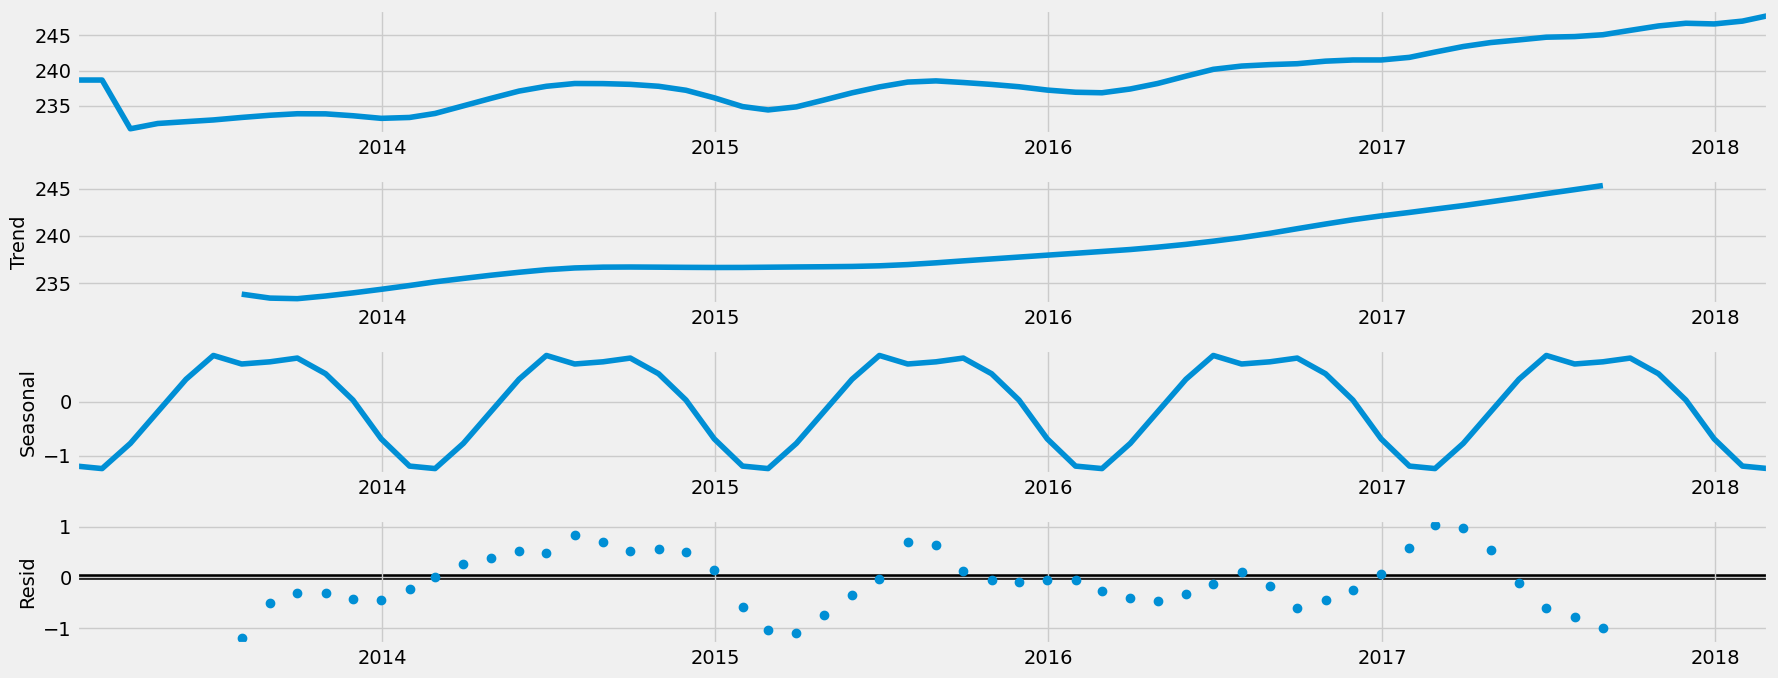

In [136]:
# Plot the separate components

decomposition.plot()
plt.show()

Smoothing has not helped in reducing the noise. This is because it has turned seasonality into noise. Therefore, I would not be using the data after smoothing. 

In [137]:
new_data.head()

,CPI,sma
datetime,,
2013-01-31,230.280,238.657050
2013-02-28,232.166,238.657050
2013-03-31,232.773,231.739667
2013-04-30,232.531,232.490000
2013-05-31,232.945,232.749667


In [138]:
new_data = new_data.drop('sma', axis=1)

### Testing for stationarity

In [139]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(new_data['CPI'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.941041
p-value                         0.993603
Number of Lags Used             6.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


Based on the given results, the test statistic is greater than the critical values, and the p-value is high, indicating that the data is likely non-stationary. This suggests that the CPI data from 2013 to March 2018 may exhibit trends, seasonality, or other non-stationary patterns.

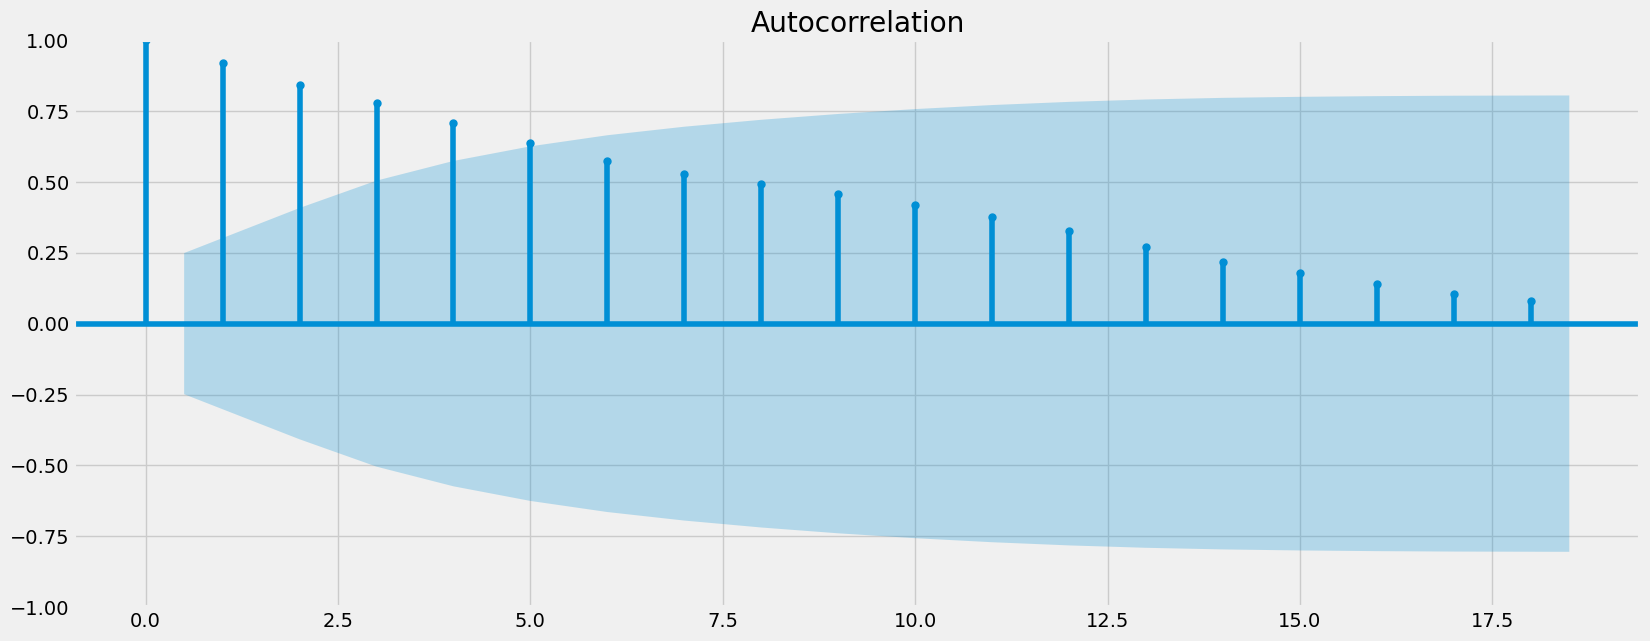

In [140]:
# Checking out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, I am importing the autocorrelation and partial correlation plots

plot_acf(new_data)
plt.show()

As you can see from above, the time series has quite a few lags correlated with each other. This means there’s a lot of autocorrelated data and the set is likely non-stationary, which supports the result of the Dickey-Fuller test I conducted earlier.

### Stationarizing the CPI Data

In [141]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = new_data - new_data.shift(1) 

In [142]:
data_diff.dropna(inplace = True) # Here, I am removing the missing values that came about as a result of the differencing. 
# I need to remove these or I won't be able to run the Dickey-Fuller test.

In [143]:
data_diff.head()

,CPI
datetime,
2013-02-28,1.886
2013-03-31,0.607
2013-04-30,-0.242
2013-05-31,0.414
2013-06-30,0.559


In [144]:
data_diff.columns

Index(['CPI'], dtype='object')

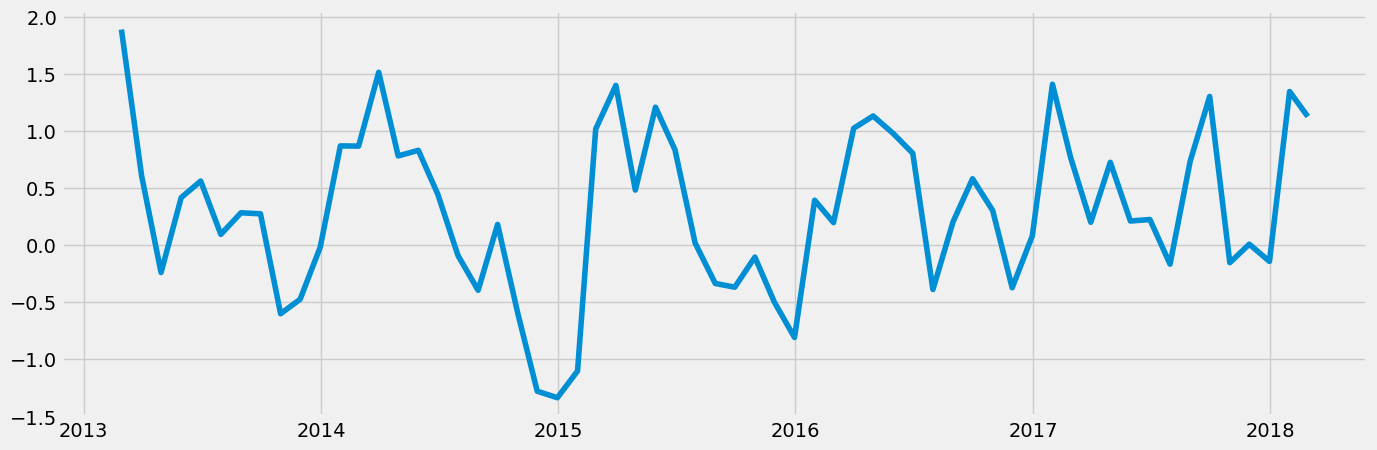

In [145]:
# Plotting the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [146]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.609620
p-value                         0.000124
Number of Lags Used             5.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64


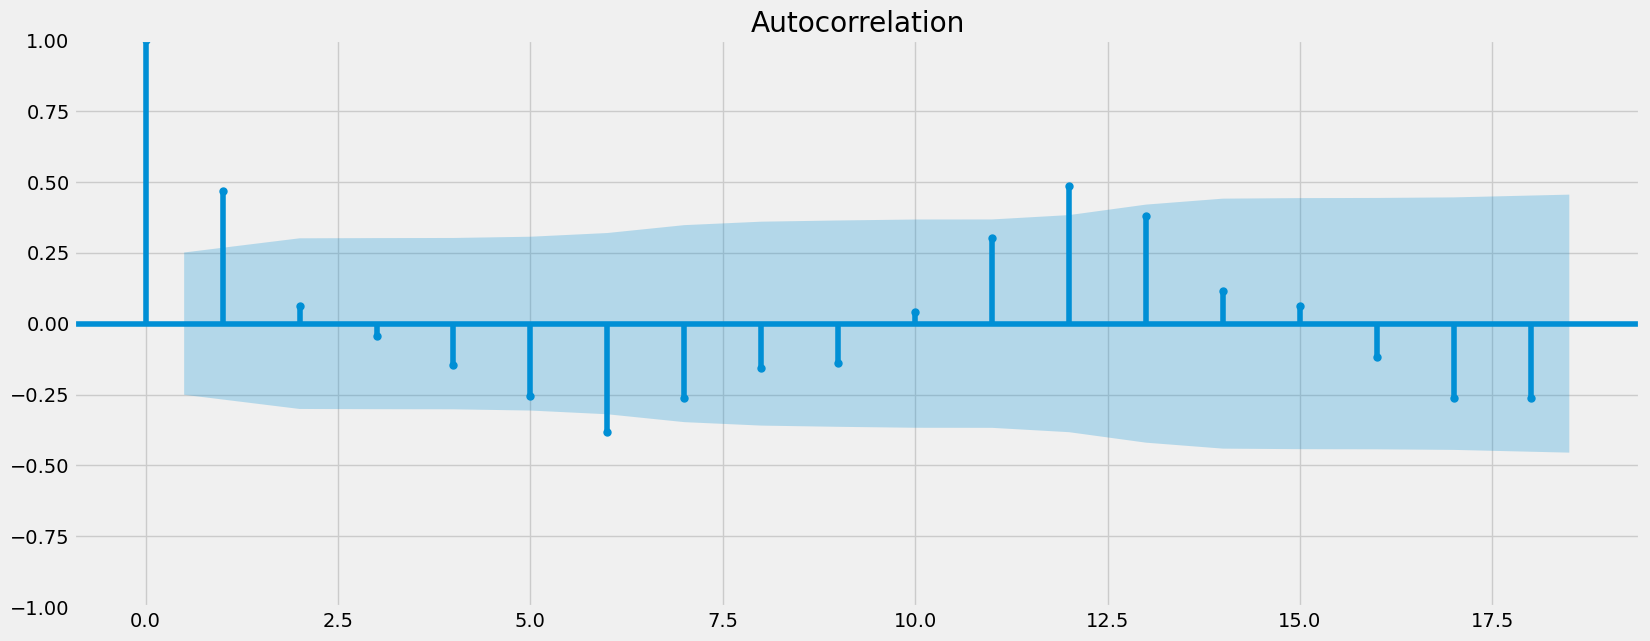

In [147]:
plot_acf(data_diff)
plt.show()

Based on the results, it can be concluded that after stationarizing the data, the Dickey-Fuller test indicates that the data is now stationary. This suggests that the trend, seasonality, and other non-stationary patterns have been removed, and the data is now suitable for further analysis using stationary time series models.